# Step1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

# Load the dataset


In [2]:
# Specify the path to the ZIP file
zip_path = "/content/drive/MyDrive/Colab Notebooks/archive (3).zip"

# Specify the name of the CSV file within the ZIP archive
csv_filename = 'healthcare-dataset-stroke-data.csv'

# Open the ZIP file and read the specified CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_file:
    # Assuming the CSV file is in the root of the ZIP archive
    with zip_file.open(csv_filename) as csv_file:
        stroke_data  = pd.read_csv(csv_file)

# Now 'df' contains the data from the specified CSV file


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/archive (3).zip'

In [ ]:
stroke_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data cleaning

In [ ]:
# Drop column = 'id'
stroke_data.drop(columns='id', inplace=True)

In [ ]:
stroke_data.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5110 entries, 0 to 5109

Data columns (total 11 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   gender             5110 non-null   object 

 1   age                5110 non-null   float64

 2   hypertension       5110 non-null   int64  

 3   heart_disease      5110 non-null   int64  

 4   ever_married       5110 non-null   object 

 5   work_type          5110 non-null   object 

 6   Residence_type     5110 non-null   object 

 7   avg_glucose_level  5110 non-null   float64

 8   bmi                4909 non-null   float64

 9   smoking_status     5110 non-null   object 

 10  stroke             5110 non-null   int64  

dtypes: float64(3), int64(3), object(5)

memory usage: 439.3+ KB


In [ ]:
stroke_data.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke_data.isna().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print((stroke_data.isna().sum()/len(stroke_data))*100)


gender               0.000000

age                  0.000000

hypertension         0.000000

heart_disease        0.000000

ever_married         0.000000

work_type            0.000000

Residence_type       0.000000

avg_glucose_level    0.000000

bmi                  3.933464

smoking_status       0.000000

stroke               0.000000

dtype: float64


In [ ]:
stroke_data.dropna(how='any', inplace=True)



# Visualizing categorical columns

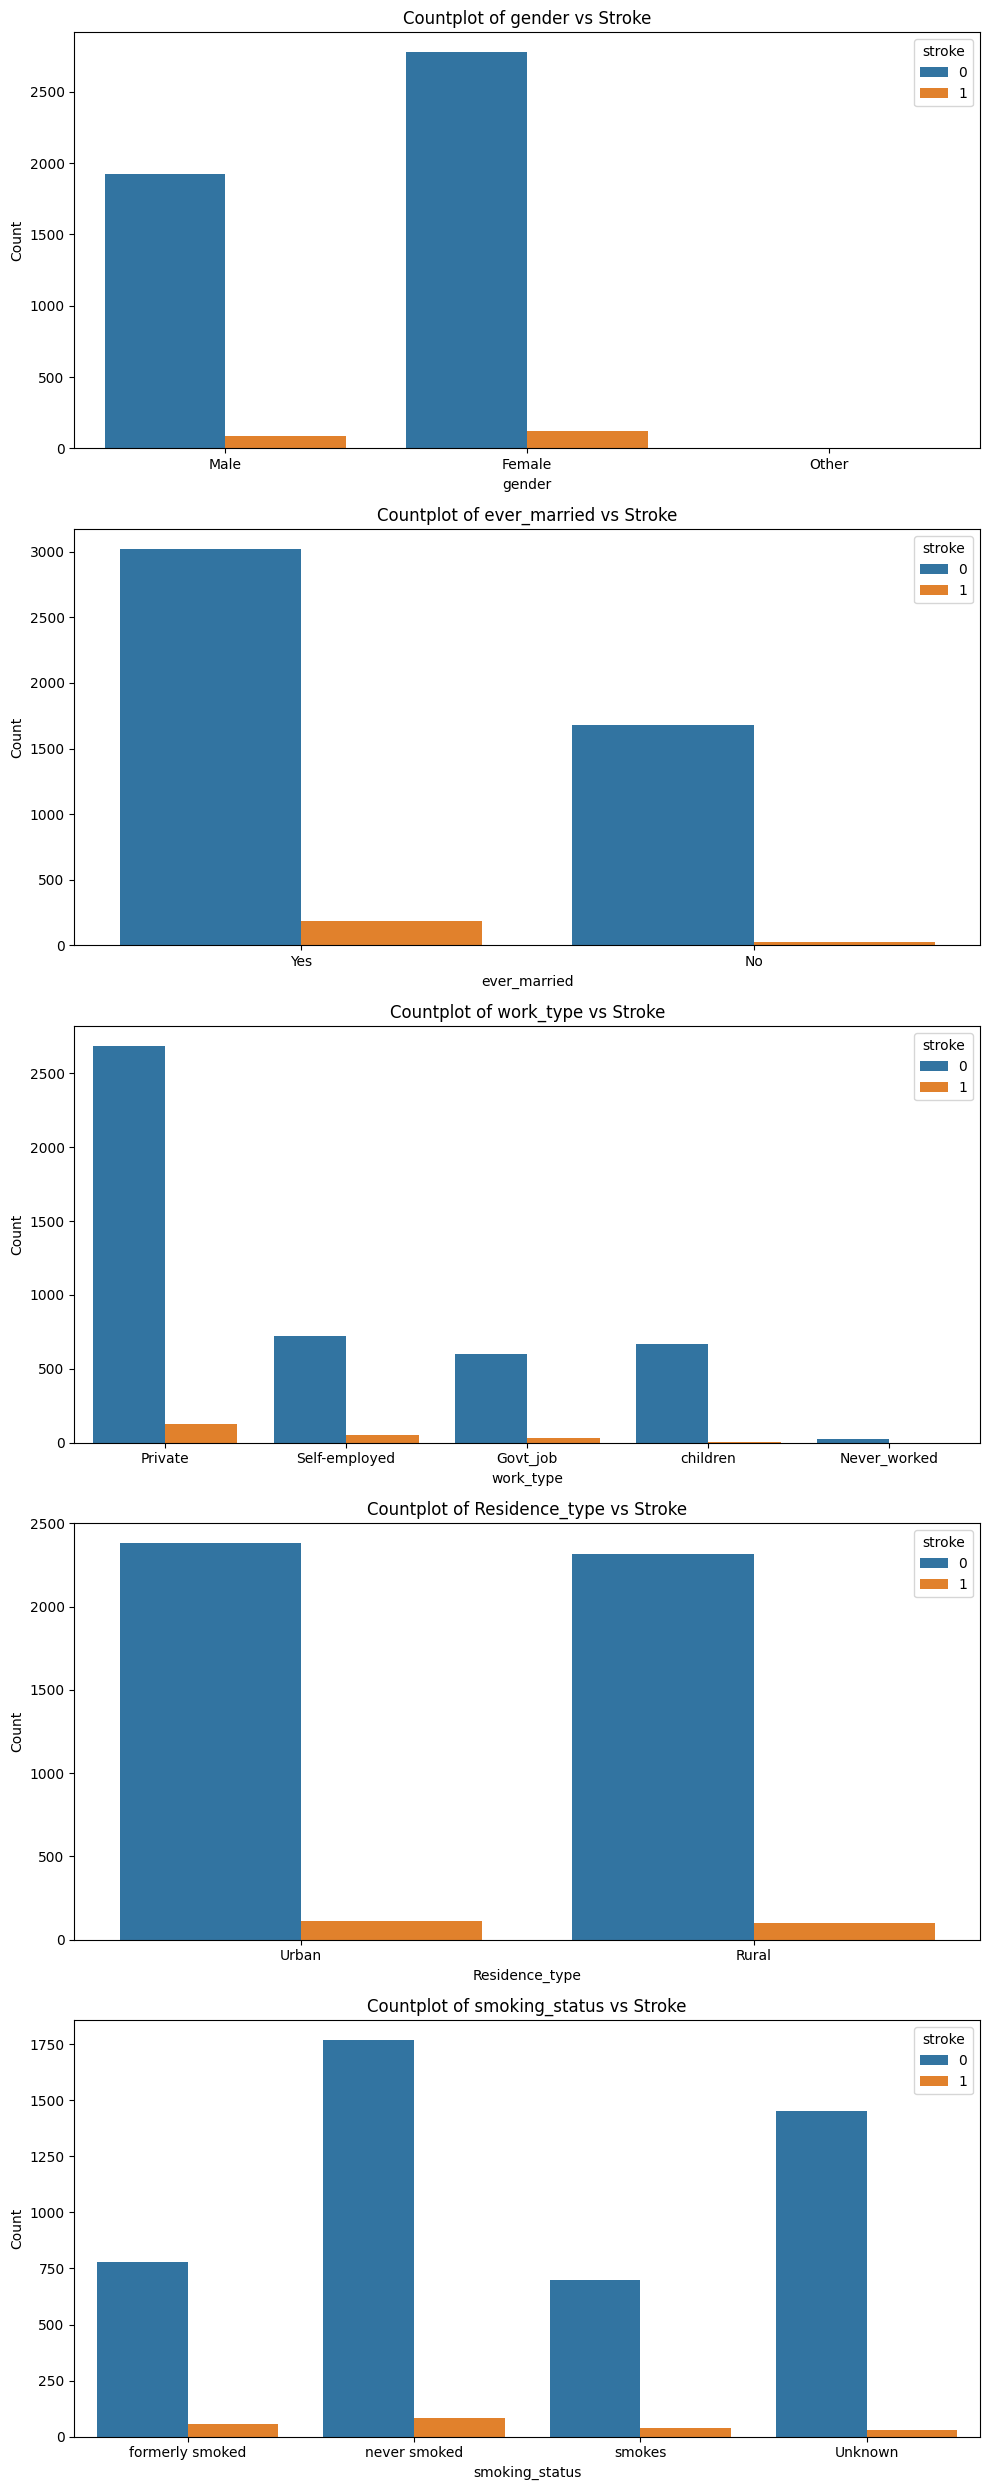

In [ ]:
# Categorical columns to visualize
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Plot count plots for each categorical column
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, hue='stroke', data=stroke_data, ax=ax)
    ax.set_title(f'Countplot of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


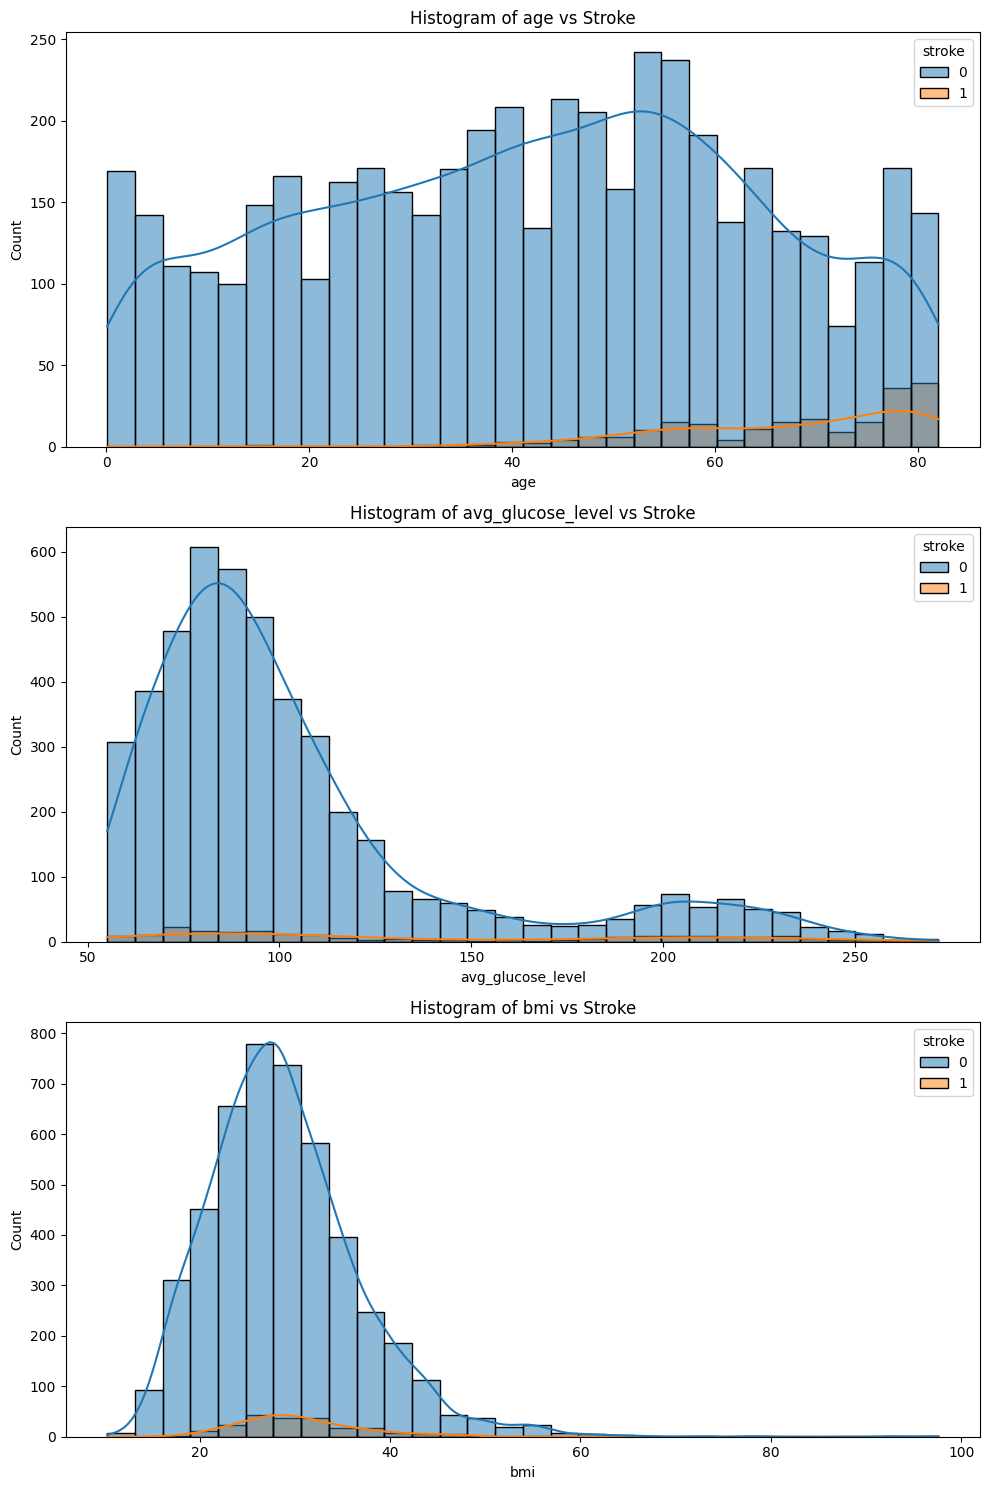

In [ ]:
# Numerical columns to visualize
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

# Plot histograms for each numerical column
for col, ax in zip(numerical_columns, axes):
    sns.histplot(x=col, hue='stroke', data=stroke_data, kde=True, ax=ax, bins=30)
    ax.set_title(f'Histogram of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
stroke_data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

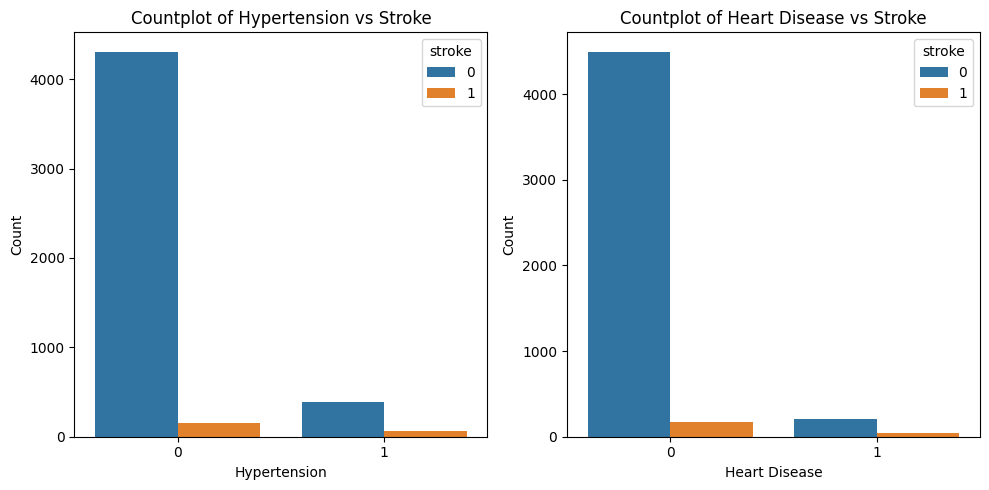

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x='hypertension', hue='stroke', data=stroke_data, ax=axes[0])
axes[0].set_title('Countplot of Hypertension vs Stroke')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

sns.countplot(x='heart_disease', hue='stroke', data=stroke_data, ax=axes[1])
axes[1].set_title('Countplot of Heart Disease vs Stroke')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Data preprocessing


In [ ]:
# One-hot encode categorical columns
stroke_data = pd.get_dummies(stroke_data, columns=categorical_columns)


In [ ]:
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
# Assuming stroke_data is your DataFrame
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

# Specify train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic regression model


In [ ]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

In [ ]:
# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support



           0       0.95      1.00      0.97       929

           1       0.00      0.00      0.00        53



    accuracy                           0.95       982

   macro avg       0.47      0.50      0.49       982

weighted avg       0.89      0.95      0.92       982




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


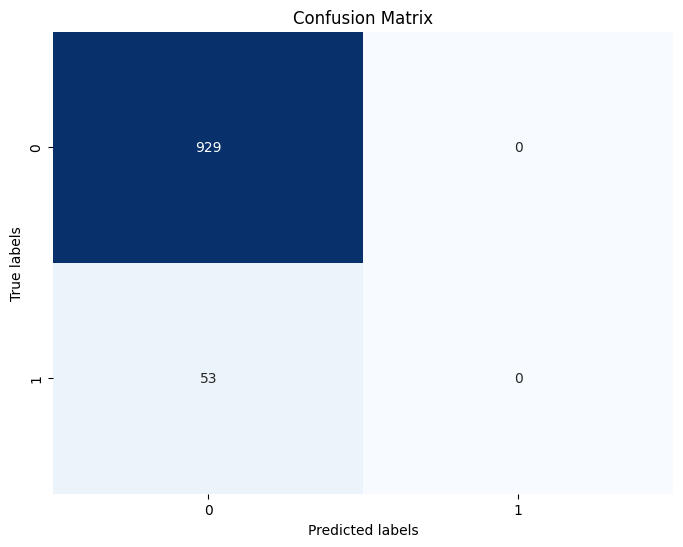

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))


0.9460285132382892


# Oversampling using SMOTE


In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

In [ ]:
# Fit the model to the SMOTE-oversampled training data
logistic_regression.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.98      0.75      0.85       929

           1       0.15      0.79      0.25        53



    accuracy                           0.75       982

   macro avg       0.57      0.77      0.55       982

weighted avg       0.94      0.75      0.82       982




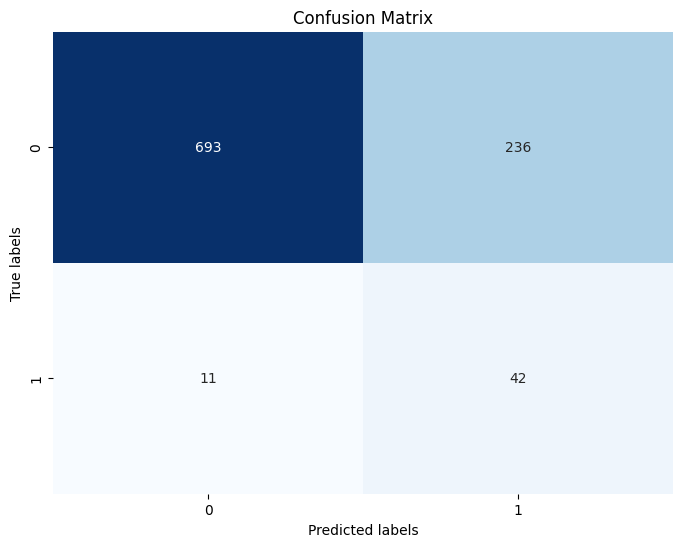

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print accuracy score
print(accuracy_score(y_test, y_pred))

0.7484725050916496


- The application of SMOTE has indeed made a significant impact on the model's performance, particularly in terms of recall for the minority class (stroke = 1). Here are some key observations from the updated results

- In scenarios where predicting strokes (class 1) is crucial, the improved recall for class 1 is a positive outcome.

# the performance metrics before and after applying SMOTE using bar plots for precision, recall, and F1-score for both classes (stroke = 0 and

In [ ]:
# Performance metrics before SMOTE
precision_before = [0.95, 0.0]
recall_before = [1.0, 0.0]
f1_before = [0.97, 0.0]

# Performance metrics after SMOTE
precision_after = [0.98, 0.15]
recall_after = [0.75, 0.79]
f1_after = [0.85, 0.25]

# Plotting
labels = ['Class 0 (No Stroke)', 'Class 1 (Stroke)']
width = 0.35

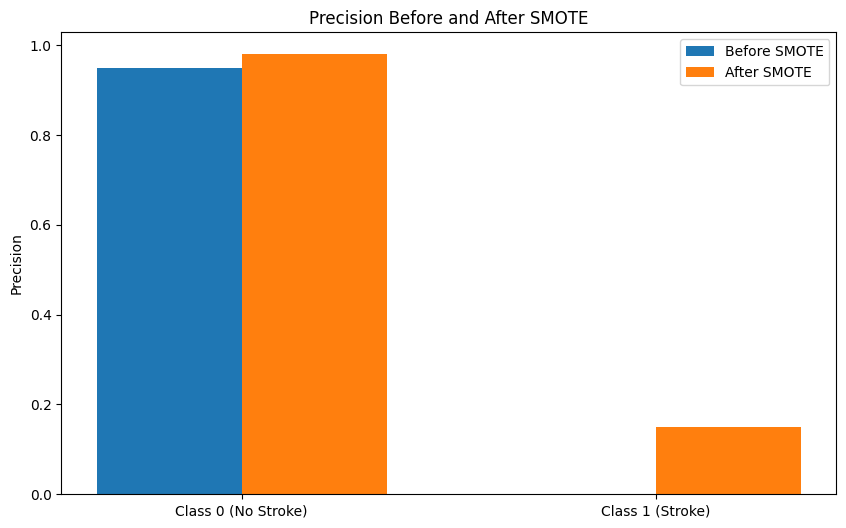

In [ ]:
# Bar plots for precision
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(len(labels)) - width/2, precision_before, width, label='Before SMOTE')
ax.bar(np.arange(len(labels)) + width/2, precision_after, width, label='After SMOTE')

ax.set_ylabel('Precision')
ax.set_title('Precision Before and After SMOTE')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.show()

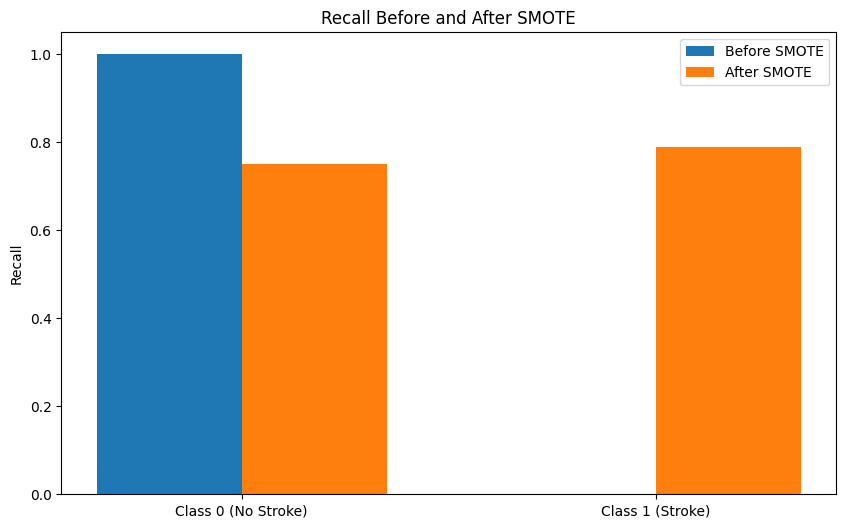

In [ ]:
# Bar plots for recall
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(len(labels)) - width/2, recall_before, width, label='Before SMOTE')
ax.bar(np.arange(len(labels)) + width/2, recall_after, width, label='After SMOTE')

ax.set_ylabel('Recall')
ax.set_title('Recall Before and After SMOTE')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.show()


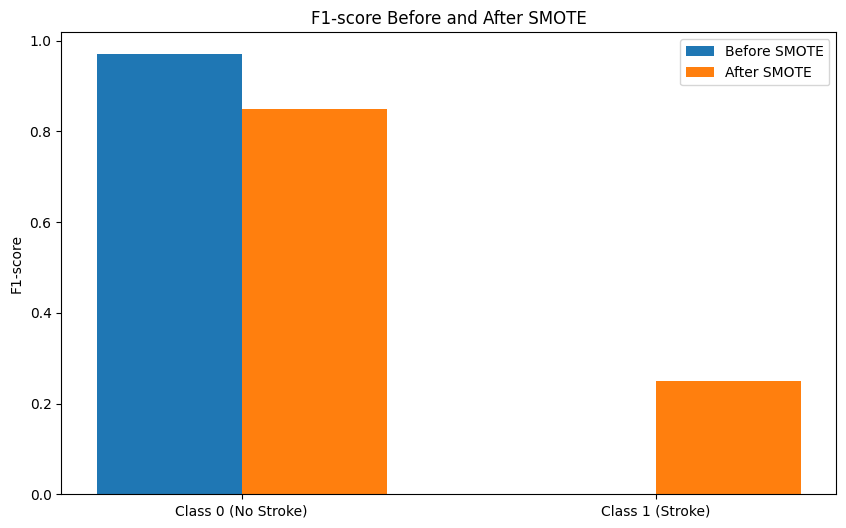

In [ ]:
# Bar plots for F1-score
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(len(labels)) - width/2, f1_before, width, label='Before SMOTE')
ax.bar(np.arange(len(labels)) + width/2, f1_after, width, label='After SMOTE')

ax.set_ylabel('F1-score')
ax.set_title('F1-score Before and After SMOTE')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# some insights and observations from the analysis and modeling of the stroke prediction dataset:

1. Data Overview:

The dataset contains information about individuals, including age, gender, marital status, work type, residence type, average glucose level, BMI, smoking status, and whether the person had a stroke.
There was a small amount of missing data in the BMI column, and those rows were dropped during preprocessing.

2. Data Exploration:

The dataset is imbalanced, with a significantly higher number of individuals who did not have a stroke (0) compared to those who had a stroke (1).
The exploration of categorical columns revealed interesting patterns, such as a higher occurrence of strokes in older individuals, those with hypertension, and those with heart disease.

3. Data Preprocessing:

Label encoding and one-hot encoding were applied to categorical columns to prepare the data for modeling.
Missing values were handled by dropping rows with missing BMI values.

4. Data Visualization:

Countplots and histograms were used to visualize the distribution of stroke occurrences based on categorical and numerical features.
The impact of variables like hypertension and heart disease on stroke occurrence was examined.

5. Modeling:

A logistic regression model was initially trained without addressing class imbalance, resulting in high accuracy but poor performance on predicting strokes (class 1).
After applying SMOTE to oversample the minority class, the model's performance improved, especially in terms of recall for strokes.

6. Model Evaluation:

The model achieved a balanced performance, with improved recall for strokes, indicating better identification of individuals at risk.
The confusion matrix and classification report provided detailed insights into the model's predictions.

7. Insights for Future Work:

Further exploration and feature engineering could enhance the model's predictive power.
Consideration of additional models and hyperparameter tuning might improve performance.
Continuous monitoring and updates to the model as more data becomes available could enhance its effectiveness.